In [1]:
import numpy as np
import pandas as pd
import cv2
import os
import matplotlib.pyplot as plt
from PIL import Image as im
from PIL import Image
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

from scipy import ndimage
#Show the maxsize of printed binary images
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)
from PIL import Image
# save numpy array as csv file
from numpy import save
from numpy import savetxt

#Print different image
import argparse

import cv2 as cv
from matplotlib import pyplot as plt

In [ ]:
#Build the Connected Component
def connected_component_label(folder_path,filename):
    path = folder_path+"/"+filename
    if len(filename.split("_"))>1:

        day = filename.split("_")[0][3:]
        # Extracting the substring and filtering out non-numeric characters
        component = ''.join(filter(str.isdigit, filename.split("_")[1][1:-4]))

        # Converting the filtered substring to an integer and adding 1
        component = str(int(component) + 1)
        #print(path)
        # Getting the input image
        img = cv2.imread(path, 0)
        # Converting those pixels with values 1-127 to 0 and others to 1
        img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)[1]
        #print(img)
        # Print array into image
        im = Image.fromarray(img)
        # Applying cv2.connectedComponents()
        num_labels, labels = cv2.connectedComponents(img)
        #print('num_labels - ', num_labels)



        # loop over the number of unique connected component labels
        for i in range(1, num_labels):
            output = img.copy()
            # construct a mask for the current connected component by
            # finding a pixels in the labels array that have the current
            # connected component ID
            componentMask = (labels == i).astype("uint8") * 255
            # show our output image and connected component mask
            #cv2.imshow("Output", output)
            #cv2.imshow("Connected Component", componentMask)
            im = Image.fromarray(componentMask)
            im.save( "C:/Users/kharep/Downloads/Kmean_Norm_Non-Plus1/ConectedComponent/" + "day" + day + "_c" + component + "_cp" + str(i) + ".png")

            #cv2.waitKey(0)

        # Map component labels to hue val, 0-179 is the hue range in OpenCV
        label_hue = np.uint8(179 * labels / np.max(labels))
        blank_ch = 255 * np.ones_like(label_hue)
        labeled_img = cv2.merge([label_hue, blank_ch, blank_ch])

        # Converting cvt to BGR
        labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)

        # set bg label to black
        labeled_img[label_hue == 0] = 0


   #((result_sum.max()-result_sum.min())//100)+2 \

for x in range(1,3651):
    folder_path = 'Pressure_img_cluster/day'+ str(x)
    files = os.listdir(folder_path)
    num_files = len(files)
    for filename in os.listdir(folder_path):
        connected_component_label(folder_path,filename)

In [2]:
#By using some parameter, divide the ConectedComponent to InterestImage&NonInterestImage
path = "C:/Users/kharep/Downloads/Kmean_Norm_Non-Plus1/ConectedComponent"
for filename in os.listdir(path):
    f = os.path.join(path,filename)
    # print(type(f))
    if os.path.isfile(f): #& f[1:3] != 'DS_store':
        f_name = 'Kmean_Norm_Non-Plus1/ConectedComponent/' + filename
        f_name_new = filename[:-4]
        print(f_name_new)
        # print(f_name)
    #1
    im = cv.imread(f,cv.IMREAD_COLOR)
    #print(im.size)
    #print(im.shape)
    imgray = cv.cvtColor(im , cv.COLOR_BGR2GRAY)
    ret,thresh = cv.threshold(imgray,127,255,cv.THRESH_BINARY)
    contours, hierarchy = cv.findContours(thresh,cv.RETR_TREE,cv.CHAIN_APPROX_SIMPLE)
    cv.drawContours(im, contours, -1, (0,255,0), 3)
    # cv.imshow('output',im)
    cnt = contours[0]
    cv.drawContours(im, [cnt], 0, (0,255,0), 3)
    # cv.imshow('output',im)
    cv.CHAIN_APPROX_NONE
    cv.CHAIN_APPROX_SIMPLE
    gray = cv.cvtColor(im, cv.COLOR_BGR2GRAY)

    blur = cv.GaussianBlur(gray, (5, 5),cv.BORDER_DEFAULT)
    ret, thresh = cv.threshold(blur, 200, 255,cv.THRESH_BINARY_INV)
    for i in contours:
        M = cv.moments(i)
        if M['m00'] != 0:
            cx = int(M['m10']/M['m00'])
            cy = int(M['m01']/M['m00'])
            cv.drawContours(im, [i], -1, (0, 255, 0), 2)
            cv.circle(im, (cx, cy), 7, (0, 0, 255), -1)
            cv.putText(im, "center", (cx - 20, cy - 20),
                       cv.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 2)
        # print(f"cx: {cx} cy: {cy}")
    #cv.imwrite("center.png", im)

    #2
    x, y, w, h = cv2.boundingRect(max(contours, key=cv2.contourArea))
    cv2.rectangle(im, (x, y), (x + w, y + h), (0, 0, 255), 2)
    #print(f"x: {x} y: {y} w: {w} h: {h}")
    #3
    img = cv2.imread(f)
    # cv2.imshow('Image',im)
    # counting the number of pixels
    number_of_white_pix = np.sum(img == 255)
    number_of_black_pix = np.sum(img == 0)
    area_pix = number_of_white_pix/3
    # print('Number of white pixels:', area_pix)
    # print('Number of black pixels:', number_of_black_pix/3)
    if ( (2< area_pix < 245 ) and (2 < w < 25) and (2 < h < 20) and (10< cx < 103) and (10 < cy < 64)):
        #img_new = im.fromarray(np.uint8(img))
        cv2.imwrite("C:/Users/kharep/Downloads/Kmean_Norm_Non-Plus1/InterestImagenew/" + f_name_new+"_" +str(w)+"_"+ str(h) +".png",img)


    else:
        cv2.imwrite("/C:/Users/kharep/Downloads/Kmean_Norm_Non-Plus1/NonInterestImagenew/" + f_name_new + ".png",img)



day1000_c10_cp1
day1000_c11_cp1
day1000_c12_cp1
day1000_c13_cp1
day1000_c14_cp1
day1000_c15_cp1
day1000_c15_cp2
day1000_c15_cp3
day1000_c16_cp1
day1000_c16_cp2
day1000_c16_cp3
day1000_c2_cp1
day1000_c3_cp1
day1000_c4_cp1
day1000_c5_cp1
day1000_c6_cp1
day1000_c7_cp1
day1000_c8_cp1
day1000_c9_cp1
day1001_c10_cp1
day1001_c11_cp1
day1001_c12_cp1
day1001_c13_cp1
day1001_c13_cp2
day1001_c14_cp1
day1001_c15_cp1
day1001_c15_cp2
day1001_c16_cp1
day1001_c16_cp2
day1001_c16_cp3
day1001_c2_cp1
day1001_c3_cp1
day1001_c4_cp1
day1001_c5_cp1
day1001_c6_cp1
day1001_c7_cp1
day1001_c8_cp1
day1001_c9_cp1
day1002_c10_cp1
day1002_c11_cp1
day1002_c12_cp1
day1002_c12_cp2
day1002_c13_cp1
day1002_c14_cp1
day1002_c15_cp1
day1002_c15_cp2
day1002_c15_cp3
day1002_c16_cp1
day1002_c16_cp2
day1002_c16_cp3
day1002_c2_cp1
day1002_c3_cp1
day1002_c4_cp1
day1002_c5_cp1
day1002_c6_cp1
day1002_c7_cp1
day1002_c8_cp1
day1002_c9_cp1
day1003_c10_cp1
day1003_c11_cp1
day1003_c12_cp1
day1003_c12_cp2
day1003_c13_cp1
day1003_c13_cp2


In [ ]:
print(f_name_new)

In [2]:

#save the datalist as txt, then modify the title as excel
path = "C:/Users/kharep/Downloads/Kmean_Norm_Non-Plus1/InterestImagenew"
for filename in os.listdir(path):
    f = os.path.join(path,filename)
    #print(type(f))
    if os.path.isfile(f): #& f[1:3] != 'DS_store':
        f_name = 'C:/Users/kharep/Downloads/Kmean_Norm_Non-Plus1/InterestImagenew' + f[35:]
        #print(f_name)
        f_name_new = f_name[:-4]
        #print(f_name_new)
        f_print = filename[:-4]
        print(f_print)

    im = cv.imread(f,cv.IMREAD_COLOR)
    imgray = cv.cvtColor(im,cv.COLOR_BGR2GRAY)
    ret,thresh = cv.threshold(imgray,127,255,cv.THRESH_BINARY)
    contours, hierarchy = cv.findContours(thresh,cv.RETR_TREE,cv.CHAIN_APPROX_SIMPLE)

    for i in contours:
        points = ''
        M = cv.moments(i)
        if M['m00'] != 0:
            cx = int(M['m10']/M['m00'])
            cy = int(M['m01']/M['m00'])

        for point in i:
          # Extract x and y coordinates of the point
          x, y = point[0]
          # Concatenate the coordinate string to the points string
          points += f'({x},{y})'



        #change
        with open("C:/Users/kharep/Downloads/Kmean_Norm_Non-Plus1/InterestImageCenterKmeanNormNonPlus1new.txt","a")as file:
          content = [f_print,"_",str(cx), "_",str(cy) ,"_",points,"\n"]
          file.writelines(content)
          file.close()

day1001_c13_cp2_6_4
day1002_c12_cp2_4_7
day1002_c16_cp1_12_12
day1003_c12_cp2_3_3
day1003_c13_cp2_11_9
day1004_c11_cp2_4_4
day1004_c12_cp2_9_10
day1005_c10_cp2_5_5
day1006_c14_cp1_3_7
day1008_c12_cp2_4_3
day1009_c13_cp1_9_11
day1009_c2_cp1_13_5
day100_c5_cp2_16_16
day1010_c2_cp1_15_10
day1011_c11_cp2_4_5
day1011_c2_cp2_17_8
day1012_c14_cp2_11_6
day1012_c2_cp2_11_6
day1013_c11_cp2_13_10
day1013_c2_cp2_14_9
day1014_c11_cp2_11_7
day1015_c12_cp2_7_4
day1017_c7_cp2_8_8
day1018_c11_cp2_3_3
day1018_c15_cp1_21_15
day1019_c15_cp1_6_4
day1021_c14_cp1_11_7
day1021_c16_cp1_10_5
day1022_c13_cp1_16_16
day1022_c16_cp1_12_13
day1023_c16_cp1_14_10
day1024_c12_cp2_8_5
day1024_c17_cp1_13_8
day1025_c17_cp1_21_7
day1026_c17_cp1_18_6
day1027_c18_cp1_7_3
day1029_c14_cp3_5_3
day1030_c6_cp2_9_8
day1031_c7_cp2_14_12
day1035_c15_cp2_10_13
day1035_c2_cp1_5_4
day1036_c8_cp1_5_4
day1041_c17_cp1_5_3
day1041_c17_cp2_3_4
day1041_c3_cp3_6_5
day1043_c15_cp2_4_3
day1044_c10_cp1_10_12
day1049_c15_cp2_13_12
day1049_c16_cp2

In [3]:
data1 = pd.read_table("C:/Users/kharep/Downloads/Kmean_Norm_Non-Plus1/InterestImageCenterKmeanNormNonPlus1new.txt",sep = '_', header = None)
data1.head()
# data1.columns = ['Day', 'Cluster','ConectedComponent','CenterX','CenterY',]
# data1

,0,1,2,3,4,5,6,7
0,day1001,c13,cp2,6,4,63,48,"(62,47)(61,48)(62,49)(62,50)(64,50)(65,49)(65,..."
1,day1002,c12,cp2,4,7,41,44,"(41,42)(40,43)(40,47)(41,48)(43,46)(43,42)"
2,day1002,c16,cp1,12,12,20,48,"(21,43)(20,44)(19,44)(17,46)(17,47)(15,49)(15,..."
3,day1003,c12,cp2,3,3,38,48,"(37,47)(37,49)(39,49)(39,47)"
4,day1003,c13,cp2,11,9,38,47,"(38,44)(37,45)(36,45)(34,47)(34,50)(35,51)(36,..."


In [4]:
data1.shape[0]

8024

In [5]:
data1.columns = ['Day', 'Cluster','ConectedComponent',"Width","height",'CenterX','CenterY','List of points']
data1.to_csv("C:/Users/kharep/Downloads/Kmean_Norm_Non-Plus1/Final_ROI_data_new_final.csv", index=False)

In [7]:
data1

,Day,Cluster,ConectedComponent,Width,height,CenterX,CenterY,List of points
0,day1001,c13,cp2,6,4,63,48,"(62,47)(61,48)(62,49)(62,50)(64,50)(65,49)(65,..."
1,day1002,c12,cp2,4,7,41,44,"(41,42)(40,43)(40,47)(41,48)(43,46)(43,42)"
2,day1002,c16,cp1,12,12,20,48,"(21,43)(20,44)(19,44)(17,46)(17,47)(15,49)(15,..."
3,day1003,c12,cp2,3,3,38,48,"(37,47)(37,49)(39,49)(39,47)"
4,day1003,c13,cp2,11,9,38,47,"(38,44)(37,45)(36,45)(34,47)(34,50)(35,51)(36,..."
...,...,...,...,...,...,...,...,...
8019,day998,c13,cp2,12,12,37,48,"(36,43)(35,44)(34,44)(33,45)(33,46)(32,47)(32,..."
8020,day999,c12,cp2,5,4,102,34,"(101,33)(100,34)(100,35)(101,36)(103,36)(104,3..."
8021,day999,c12,cp3,3,4,37,44,"(37,43)(36,44)(36,45)(37,46)(38,45)(38,44)"
8022,day999,c15,cp1,9,8,53,37,"(50,34)(49,35)(49,37)(50,38)(50,39)(52,41)(56,..."


In [9]:
import re

# Function to extract points and expand DataFrame
def expand_points(row):
    points = re.findall(r'\((\d+),(\d+)\)', row['List of points'])
    expanded_rows = []
    for x, y in points:
        new_row = row.drop('List of points').to_dict()
        new_row['x'] = int(x)
        new_row['y'] = int(y)
        expanded_rows.append(new_row)
    return pd.DataFrame(expanded_rows)

# Apply the function to each row and concatenate the results
expanded_df = pd.concat([expand_points(row) for _, row in data1.iterrows()], ignore_index=True)

            Day Cluster ConectedComponent  Width  height  CenterX  CenterY  \
0       day1001     c13               cp2      6       4       63       48   
1       day1001     c13               cp2      6       4       63       48   
2       day1001     c13               cp2      6       4       63       48   
3       day1001     c13               cp2      6       4       63       48   
4       day1001     c13               cp2      6       4       63       48   
...         ...     ...               ...    ...     ...      ...      ...   
111701    day99      c3               cp2     16       9       93       20   
111702    day99      c3               cp2     16       9       93       20   
111703    day99      c3               cp2     16       9       93       20   
111704    day99      c3               cp2     16       9       93       20   
111705    day99      c3               cp2     16       9       93       20   

          x   y  
0        62  47  
1        61  48  
2        

In [10]:
expanded_df

,Day,Cluster,ConectedComponent,Width,height,CenterX,CenterY,x,y
0,day1001,c13,cp2,6,4,63,48,62,47
1,day1001,c13,cp2,6,4,63,48,61,48
2,day1001,c13,cp2,6,4,63,48,62,49
3,day1001,c13,cp2,6,4,63,48,62,50
4,day1001,c13,cp2,6,4,63,48,64,50
...,...,...,...,...,...,...,...,...,...
111701,day99,c3,cp2,16,9,93,20,99,21
111702,day99,c3,cp2,16,9,93,20,101,19
111703,day99,c3,cp2,16,9,93,20,101,18
111704,day99,c3,cp2,16,9,93,20,100,18


In [28]:
import pandas as pd


data = expanded_df

# Load the '15x15_area_f' file
area_f_file_path = 'C:/Users/kharep/Downloads/15x15_area_f.csv'
area_f = pd.read_csv(area_f_file_path)

# Create a lookup dictionary from the '15x15_area_f' file
roi_to_label = dict(zip(area_f['ROI'], area_f['Label']))

# Initialize the 'Label' column in your main data
data['Label'] = None

# Define tolerance range
tolerance = 3

# Iterate through each row in your data
for index, row in data.iterrows():
    day = row['Day'].split('day')[1]
    center_x = row['CenterX']
    center_y = row['CenterY']
    
    found = False  # Flag to indicate if a match was found

    # Check within the tolerance range
    for dx in range(-tolerance, tolerance + 1):
        for dy in range(-tolerance, tolerance + 1):
            day_center_str = f"{day}_{center_x + dx}_{center_y + dy}"
            
            # Check if the constructed string is in the 'ROI' column of the '15x15_area_f' file
            if day_center_str in roi_to_label:
                # Add the corresponding label to the 'Label' column in your data
                data.at[index, 'Label'] = roi_to_label[day_center_str]
                found = True
                break
        if found:
            break

In [29]:
data

,Day,Cluster,ConectedComponent,Width,height,CenterX,CenterY,x,y,Label
0,day1001,c13,cp2,6,4,63,48,62,47,COL
1,day1001,c13,cp2,6,4,63,48,61,48,COL
2,day1001,c13,cp2,6,4,63,48,62,49,COL
3,day1001,c13,cp2,6,4,63,48,62,50,COL
4,day1001,c13,cp2,6,4,63,48,64,50,COL
...,...,...,...,...,...,...,...,...,...,...
111701,day99,c3,cp2,16,9,93,20,99,21,CL
111702,day99,c3,cp2,16,9,93,20,101,19,CL
111703,day99,c3,cp2,16,9,93,20,101,18,CL
111704,day99,c3,cp2,16,9,93,20,100,18,CL


In [30]:
rows_with_no_label = data[data['Label'].isna()]

# Print the rows with no label
print("Rows with no label:")
print(rows_with_no_label.shape)

Rows with no label:
(42970, 10)


In [32]:

# Save the updated data to a new CSV file
output_file_path = 'C:/Users/kharep/Downloads/contour_data.csv'
data.to_csv(output_file_path, index=False)


In [39]:
import os
import re
import pandas as pd
from PIL import Image
import numpy as np

# Define the path to the folder containing images and the CSV file
image_folder_path = 'C:/Users/kharep/Downloads/Kmean_Norm_Non-Plus1/InterestImagenew'
csv_file_path = 'C:/Users/kharep/Downloads/15x15_data - 15x15_data.csv'

# Read the CSV file
csv_data = pd.read_csv(csv_file_path)

# Function to extract Day#_x_y from the Name column
def extract_day_x_y(name):
    parts = name.split('_')
    day = parts[0]
    x = parts[3]
    y = parts[4]
    return f"{day}_{x}_{y}"

# Apply the function to the Name column
csv_data['Day_x_y'] = csv_data['Name'].apply(extract_day_x_y)

# Display the resulting DataFrame
# print(df)

# Create a dictionary from the CSV file for quick lookup
label_dict = dict(zip(csv_data['Day_x_y'], csv_data['Label']))

# Initialize an empty list to store the data
data = []

# Regular expression pattern to extract metadata from filenames
filename_pattern = re.compile(r'day(\d+)_c(\d+)_cp(\d+)_(\d+)_(\d+)')

def find_label(day, center_x, center_y, label_dict):
    # Try the exact match first
    roi_string = f"{day}_{center_x}_{center_y}"
    label = label_dict.get(roi_string, None)
    
    if label is not None:
        return label
    
    # If no exact match, check within the tolerance range
    for dx in [-1, 0, 1]:
        for dy in [-1, 0, 1]:
            if dx == 0 and dy == 0:
                continue
            roi_string = f"{day}_{center_x + dx}_{center_y + dy}"
            label = label_dict.get(roi_string, None)
            if label is not None:
                return label
    
    # If no match found, return None
    return None

# Process each image in the folder
for filename in os.listdir(image_folder_path):
    if filename.endswith('.png') or filename.endswith('.jpg'):
        # Extract metadata from the filename
        match = filename_pattern.match(filename)
        if match:
            day, cluster, component, _, _ = match.groups()

            # Load the image
            image_path = os.path.join(image_folder_path, filename)
            image = Image.open(image_path)
            image = image.convert('L')  # Convert to grayscale
            image_array = np.array(image)

            # Find the coordinates of white space
            white_coords = np.argwhere(image_array == 255)

            if white_coords.size > 0:
                # Calculate the centroid of the white space
                centroid = np.mean(white_coords, axis=0).astype(int)
                center_x, center_y = centroid

                # Find the label using the new function with tolerance
                label = find_label(day, center_y, center_x, label_dict)

                # Add each coordinate to the data list
                for coord in white_coords:
                    x, y = coord
                    data.append([int(day), int(cluster), int(component), center_y, center_x, y, x, label])

# Create a DataFrame from the data list
columns = ['Day', 'Cluster', 'ConnectedComponent', 'CenterX', 'CenterY', 'x', 'y', 'Label']
df = pd.DataFrame(data, columns=columns)
df.head()
# Save the final DataFrame to a CSV file
output_csv_path = 'C:/Users/kharep/Downloads/processed_image_data.csv'
df.to_csv(output_csv_path, index=False)

# print(f'DataFrame created and saved to {output_csv_path}')


In [40]:
df[df['Day'] == 1002]

,Day,Cluster,ConnectedComponent,CenterX,CenterY,x,y,Label
17,1002,12,2,41,44,41,42,COL
18,1002,12,2,41,44,42,42,COL
19,1002,12,2,41,44,43,42,COL
20,1002,12,2,41,44,40,43,COL
21,1002,12,2,41,44,41,43,COL
...,...,...,...,...,...,...,...,...
129,1002,16,1,20,48,19,53,COH
130,1002,16,1,20,48,20,53,COH
131,1002,16,1,20,48,21,53,COH
132,1002,16,1,20,48,18,54,COH


In [41]:
df = pd.read_csv('C:/Users/kharep/Downloads/processed_image_data.csv')
print(df.shape)
df = df[df['Label'].isin(['COL', 'CL', 'COH', 'NROI'])]
print(df.shape)
df.to_csv(output_csv_path, index=False)

(264612, 8)
(202819, 8)


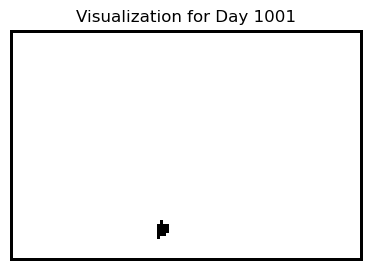

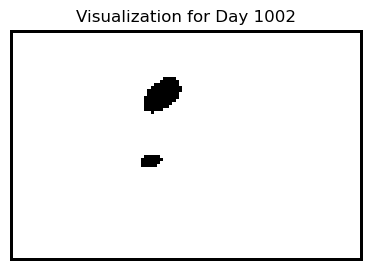

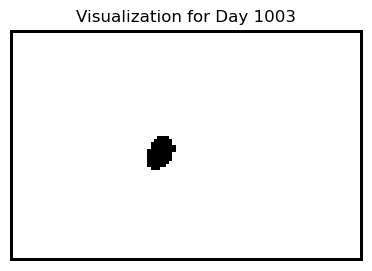

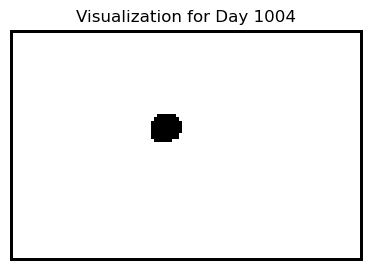

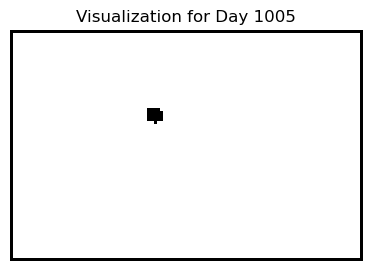

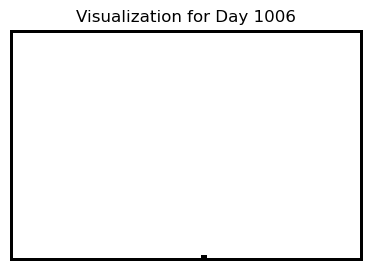

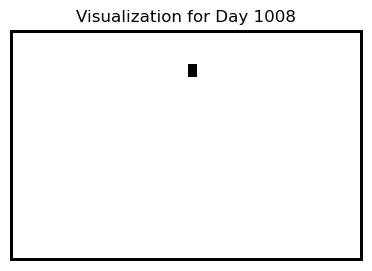

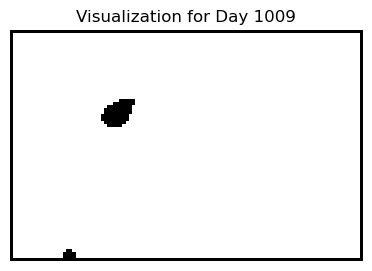

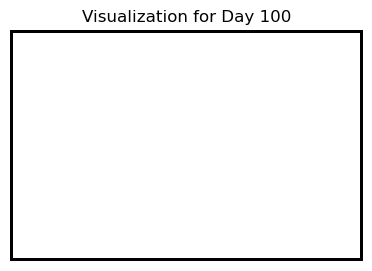

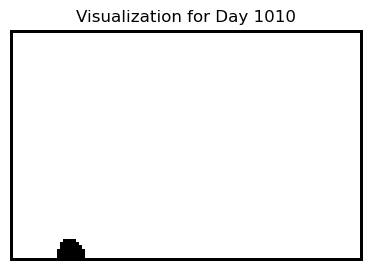

In [15]:
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Path to the processed CSV file
csv_file_path = 'C:/Users/kharep/Downloads/processed_image_data.csv'

# Read the CSV file
df = pd.read_csv(csv_file_path)

# Get the unique days in the DataFrame
unique_days = df['Day'].unique()

# Number of days to visualize
days_to_visualize = 10

# Ensure we have at least the required number of days
if len(unique_days) < days_to_visualize:
    print(f"Not enough unique days in the data. Found only {len(unique_days)} days.")
    days_to_visualize = len(unique_days)

# Process and visualize each day
for day in unique_days[:days_to_visualize]:
    # Create an empty white image of dimensions 113 x 74
    image_array = np.ones((74, 113), dtype=np.uint8) * 255  # 255 is white

    # Add a black border
    image_array[0, :] = 0  # Top border
    image_array[-1, :] = 0  # Bottom border
    image_array[:, 0] = 0  # Left border
    image_array[:, -1] = 0  # Right border

    # Segment the data for the specific day
    day_data = df[df['Day'] == day]

    # Plot the pixels using the 'x' and 'y' columns, making these pixels black
    for _, row in day_data.iterrows():
        x, y = int(row['x']), int(row['y'])
        if 0 <= x < 113 and 0 <= y < 74:
            image_array[y, x] = 0  # 0 is black

    # Create an image from the array
    image = Image.fromarray(image_array)

    # Display the image
    plt.figure(figsize=(5, 3))
    plt.title(f'Visualization for Day {day}')
    plt.imshow(image, cmap='gray')
    plt.axis('off')  # Hide axes
    plt.show()


# Draw Rectangle for ROI

In [ ]:
a = data1.shape[0]
for i in range(a):
    day = data1['Day'][i]
    c = data1['Cluster'][i]
    cp = data1['ConectedComponent'][i]
    cx = data1['CenterX'][i]
    cy = data1['CenterY'][i]
    #print(day)
    image = cv2.imread("Kmean_Norm_Non-Plus1/CESM_wholeimgfile_Rectangle/day" + str(day) +".png")
    #left
    x_left = cx-8
    #right
    x_right = cx+7
    #top
    y_top = cy-8
    #bottom
    y_bottom = cy+7
    cv2. rectangle(image,( x_left, y_top),(x_right,y_bottom) ,(0,0,255),1)
    cv2. imwrite("Kmean_Norm_Non-Plus1/CESM_wholeimgfile_Rectangle/day" + str(day) +".png",image)


# Merge Image

In [ ]:
from PIL import Image
for x in range(1,366):
    im1 = Image.open('./Outputs/Cluster_with_norm_+1/Bigpic/day' + str(x) + '.png')
    im2 = Image.open('./Kmean_Norm_Non-Plus1/CESM_wholeimgfile_Rectangle/day' + str(x) + '.png')
    def get_concat_h(im1, im2):
        dst = Image.new('RGB', (im1.width, im1.height +im2.height))
        dst.paste(im1, (0, 0))
        dst.paste(im2, (0, im1.height))
        return dst

    get_concat_h(im1, im2).save('./Kmean_Norm_Non-Plus1/CompareImageKmeanNormNonPlus1/day' + str(x) + '.png')

In [ ]:
for i in range(1,366):
    im = Image.open('./Kmean_Norm_Non-Plus1/CompareImageKmeanNormNonPlus1/day' + str(i) + '.png')
    x,y=im.size
    print("The original image im size is：",x,y)

    im.resize((6*x,6*y))
    print(im.size)
    reim=im.resize((6*x,6*y))
    reim.save('./Kmean_Norm_Non-Plus1/CompareImageKmeanNormNonPlus1/day' + str(i) + '.png')

The original image im size is： 85 110
(85, 110)
The original image im size is： 85 110
(85, 110)
The original image im size is： 85 110
(85, 110)
The original image im size is： 85 110
(85, 110)
The original image im size is： 85 110
(85, 110)
The original image im size is： 85 110
(85, 110)
The original image im size is： 85 110
(85, 110)
The original image im size is： 85 110
(85, 110)
The original image im size is： 85 110
(85, 110)
The original image im size is： 85 110
(85, 110)
The original image im size is： 85 110
(85, 110)
The original image im size is： 85 110
(85, 110)
The original image im size is： 85 110
(85, 110)
The original image im size is： 85 110
(85, 110)
The original image im size is： 85 110
(85, 110)
The original image im size is： 85 110
(85, 110)
The original image im size is： 85 110
(85, 110)
The original image im size is： 85 110
(85, 110)
The original image im size is： 85 110
(85, 110)
The original image im size is： 85 110
(85, 110)
The original image im size is： 85 110
(8

In [ ]:
from PIL import Image
for x in range(1,366):
    im1 = Image.open('./ActualLabel/day' + str(x) + '.png')
    im2 = Image.open('./Kmean_Norm_Non-Plus1/CompareImageKmeanNormNonPlus1/day' + str(x) + '.png')
    def get_concat_h(im1, im2):
        dst = Image.new('RGB', (im1.width + im2.width, im1.height))
        dst.paste(im1, (0, 0))
        dst.paste(im2, (im1.width,0))
        return dst

    get_concat_h(im1, im2).save('./Kmean_Norm_Non-Plus1/CompareImageKmeanNormNonPlus1/day' + str(x) + '.png')